### Load the Dataset

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mental health data.csv')

# View the first few rows of the dataset
print(df.head(10))


                                           statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety
5  every break, you must be nervous, like somethi...  Anxiety
6  I feel scared, anxious, what can I do? And may...  Anxiety
7    Have you ever felt nervous but didn't know why?  Anxiety
8  I haven't slept well for 2 days, it's like I'm...  Anxiety
9                 I'm really worried, I want to cry.  Anxiety


### Understand the Dataset

In [6]:
# Check the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52658 entries, 0 to 52657
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52658 non-null  object
 1   status     52658 non-null  object
dtypes: object(2)
memory usage: 822.9+ KB
None


In [7]:
# Get summary statistics
print(df.describe())

                statement  status
count               52658   52658
unique              51062       8
top     what do you mean?  Normal
freq                   22   16337


In [8]:
# Check for missing values
print(df.isnull().sum())

statement    0
status       0
dtype: int64


### Remove Duplicates

In [10]:
# Remove duplicate rows
df = df.drop_duplicates()

In [11]:
# Get summary statistics
print(df.describe())

                                                statement  status
count                                               51079   51079
unique                                              51062       8
top     Because not really. I would have survived, I a...  Normal
freq                                                    2   16035


### Text Cleaning

In [13]:
import re

# Define a function to clean the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the function to the text column
df['cleaned_statement'] = df['statement'].apply(clean_text)

In [14]:
print(df['cleaned_statement'].head(20))

0                                            oh my gosh
1     trouble sleeping confused mind restless heart ...
2     all wrong back off dear forward doubt stay in ...
3     ive shifted my focus to something else but im ...
4     im restless and restless its been a month now ...
5     every break you must be nervous like something...
6     i feel scared anxious what can i do and may my...
7         have you ever felt nervous but didnt know why
8     i havent slept well for days its like im restl...
9                       im really worried i want to cry
10    always restless every night even though i dont...
11    im confused im not feeling good lately every t...
12    sometimes what is needed when there is a probl...
13                            because this worry is you
14    sometimes its your own thoughts that make you ...
15    every time i wake up im definitely nervous and...
16    i can only hope even though im worried if it s...
17                           restive  restless r

### Tokenization and Stopword Removal

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already done
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Define a function to tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    return [word for word in words if word not in stop_words]

# Apply the function to the cleaned text
df['tokenized_text'] = df['cleaned_statement'].apply(tokenize_and_remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
print(df['tokenized_text'].head())

0                                           [oh, gosh]
1    [trouble, sleeping, confused, mind, restless, ...
2    [wrong, back, dear, forward, doubt, stay, rest...
3    [ive, shifted, focus, something, else, im, sti...
4           [im, restless, restless, month, boy, mean]
Name: tokenized_text, dtype: object


### Lemmatization or Stemming

In [19]:
from nltk.stem import WordNetLemmatizer

# Download WordNet data
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_text(words):
    return [lemmatizer.lemmatize(word) for word in words]

# Apply the function to the tokenized text
df['lemmatized_text'] = df['tokenized_text'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nikhil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
print(df['lemmatized_text'].head(20))

0                                            [oh, gosh]
1     [trouble, sleeping, confused, mind, restless, ...
2     [wrong, back, dear, forward, doubt, stay, rest...
3     [ive, shifted, focus, something, else, im, sti...
4            [im, restless, restless, month, boy, mean]
5     [every, break, must, nervous, like, something,...
6     [feel, scared, anxious, may, family, u, protec...
7                    [ever, felt, nervous, didnt, know]
8     [havent, slept, well, day, like, im, restless,...
9                      [im, really, worried, want, cry]
10    [always, restless, every, night, even, though,...
11    [im, confused, im, feeling, good, lately, ever...
12    [sometimes, needed, problem, laugh, forget, pr...
13                                              [worry]
14    [sometimes, thought, make, anxious, afraid, cl...
15    [every, time, wake, im, definitely, nervous, e...
16       [hope, even, though, im, worried, start, like]
17                        [restive, restless, re

### Save the Cleaned Data

In [22]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

# Sentiment Analysis

In [24]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to apply VADER and extract sentiment scores
def get_sentiment(text):
    sentiment_dict = sid.polarity_scores(text)
    return sentiment_dict

# Apply the function to your cleaned text data
df['sentiment_scores'] = df['cleaned_statement'].apply(get_sentiment)

# Extract the compound score (normalized sentiment score)
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Classify the sentiment based on the compound score
df['sentiment'] = df['compound_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Display the updated DataFrame
print(df[['cleaned_statement', 'compound_score', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nikhil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                   cleaned_statement  compound_score sentiment
0                                         oh my gosh          0.0000   neutral
1  trouble sleeping confused mind restless heart ...         -0.7269  negative
2  all wrong back off dear forward doubt stay in ...         -0.7351  negative
3  ive shifted my focus to something else but im ...         -0.4215  negative
4  im restless and restless its been a month now ...         -0.4939  negative


sentiment
negative    28594
positive    16837
neutral      5648
Name: count, dtype: int64


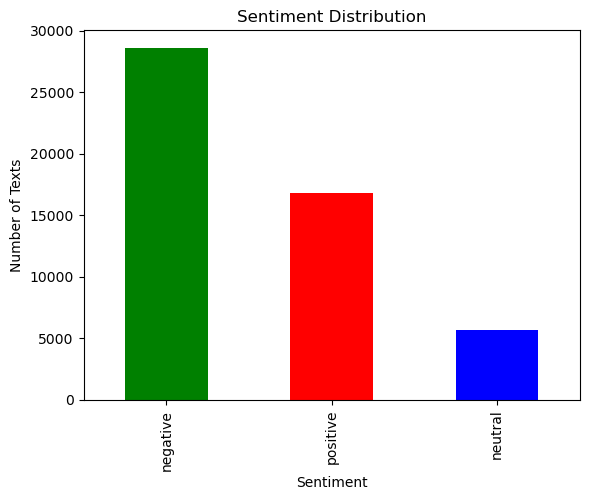

In [26]:
# Check the distribution of sentiments in the dataset
sentiment_distribution = df['sentiment'].value_counts()
print(sentiment_distribution)

# Optionally, visualize the sentiment distribution using a bar plot
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Texts')
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_statement'])

# Convert the sentiment labels to binary (1 for positive, 0 for negative/neutral)
df['binary_sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['binary_sentiment'], test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8426977290524668
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6794
           1       0.84      0.65      0.74      3422

    accuracy                           0.84     10216
   macro avg       0.84      0.80      0.81     10216
weighted avg       0.84      0.84      0.84     10216



C:\Users\Nikhil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Save the DataFrame with sentiment analysis results to a CSV file
df.to_csv('sentiment_analysis_results.csv', index=False)


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.1,1,2,3,4,5,6,7,8,9,10,100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Calculate the accuracy of the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Accuracy: {best_accuracy}")


C:\Users\Nikhil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nikhil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best Parameters: {'C': 4, 'max_iter': 100, 'solver': 'lbfgs'}
Best Accuracy: 0.851213782302271


C:\Users\Nikhil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
pip install flask


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pickle

# Assuming 'model' is your trained logistic regression model
# and 'tfidf' is your fitted TF-IDF vectorizer

# Save the model
with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)


NameError: name 'best_model' is not defined